In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Data/GOAL_kEEPERS.csv")

In [4]:
#df.info()

In [5]:
df.shape

(181, 45)

Feature selection
Dropping Constant Columns Values That are "0" and Constant


In [6]:
df2=df.drop(['Name','Based','Transfer Value'], axis=1)

In [7]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(df2)

VarianceThreshold(threshold=0)

In [8]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True,  True,  True, False,  True,  True])

In [9]:
df2.columns[var_thres.get_support()]

Index(['Unnamed: 0', 'Apps', 'Mins', 'Mins/Gm', 'Height', 'Weight', 'Age',
       'Av Rat', 'Ch C/90', 'Asts/90', 'K Ps/90', 'Pas %', 'Distance', 'K Tck',
       'Fls', 'Int/90', 'Con/90', 'xSv %', 'Sv %', 'Svh', 'Svt', 'Svp', 'PoM',
       'Tck R', 'CA', 'Saves', 'Saves/xSv%', 'Dist/Mins', 'Value'],
      dtype='object')

In [10]:
constant_columns = [column for column in df2.columns
                    if column not in df2.columns[var_thres.get_support()]]

print(len(constant_columns))

13


In [11]:
for feature in constant_columns:
     print(feature)

Gls
Gls/90
Shot %
Pen/R
xG
Cr C/A
Drb/90
Hdr %
Clear
Pens Saved Ratio
Aer A/90
Off
Gls/xG


In [12]:
#df2.drop(constant_columns,axis=1)

In [13]:
df3=df.drop(['Gls','Gls/90','Shot %','Pen/R','xG','Cr C/A','Drb/90','Hdr %','Clear','Aer A/90','Aer A/90','Off','Gls/xG','Pens Saved Ratio'],axis=1)


In [14]:
df3.to_csv('goal_keepers1.csv',index=False)

In [15]:
dfg=df3.drop(["Name","Transfer Value","Unnamed: 0"],axis=1)

In [16]:
df_summary = dfg.describe()
print(df_summary.to_string(index=True))

             Apps         Mins     Mins/Gm      Height      Weight         Age      Av Rat     Ch C/90     Asts/90     K Ps/90       Pas %    Distance       K Tck         Fls      Int/90      Con/90       xSv %        Sv %         Svh         Svt         Svp         PoM       Tck R          CA       Saves  Saves/xSv%   Dist/Mins         Value
count  181.000000   181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000  1.810000e+02
mean    15.209945  1342.038674   88.104327  189.657459   83.254144   27.198895    6.953149    0.004530    0.000718    0.143039    0.543315   78.285083    0.016575    0.276243    0.023923    1.197459   -6.635856   -0.048011   11.469613    7.436464   22.281768    1.220994    0.144917  118.867403   41.187845   -

In [17]:
dfg_variance = dfg.var()

<ipython-input-17-25967a4b412b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfg_variance = dfg.var()


In [18]:
dfg_variance = dfg.var(numeric_only=True)

In [19]:
dfg_variance_rounded = dfg_variance.round(2)


In [20]:
dfg_variance_rounded

Apps          2.690000e+01
Mins          2.174628e+05
Mins/Gm       1.849000e+01
Height        1.837000e+01
Weight        3.554000e+01
Age           1.127000e+01
Av Rat        7.000000e-02
Ch C/90       0.000000e+00
Asts/90       0.000000e+00
K Ps/90       1.000000e-02
Pas %         2.000000e-02
Distance      8.483700e+02
K Tck         2.000000e-02
Fls           4.200000e-01
Int/90        1.000000e-02
Con/90        1.300000e-01
xSv %         1.207600e+03
Sv %          1.000000e-02
Svh           5.842000e+01
Svt           1.813000e+01
Svp           1.060900e+02
PoM           1.370000e+00
Tck R         8.000000e-02
CA            4.794400e+02
Saves         3.621800e+02
Saves/xSv%    5.140000e+00
Dist/Mins     0.000000e+00
Value         2.347540e+15
dtype: float64

Dropping Columns With Low Variance"Dist/Mins","Ch C/90","Asts/90 "


In [21]:
dfg_1=dfg.drop(["Dist/Mins","Asts/90",'Ch C/90' ],axis=1)

In [22]:
#dfg_1.head()

"CA" Is Target Variable

In [23]:
dfg_1['CA'].describe()

count    181.000000
mean     118.867403
std       21.896070
min       83.000000
25%      102.000000
50%      116.000000
75%      131.000000
max      180.000000
Name: CA, dtype: float64

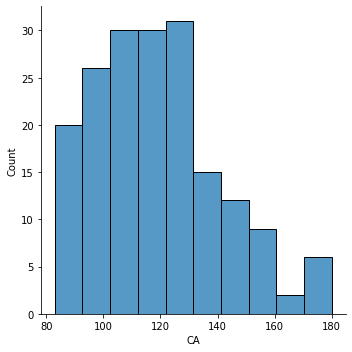

In [24]:
sns.displot(dfg_1['CA'])

In [25]:
#skweness and curtosis
print("Skewness: %f" %dfg_1['CA'].skew())
print("Kurtosis: %f" %dfg_1['CA'].kurt())

Skewness: 0.635585
Kurtosis: 0.196790


Bivariate Analysis

In [26]:
dfg_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Apps        181 non-null    float64
 1   Mins        181 non-null    float64
 2   Mins/Gm     181 non-null    float64
 3   Height      181 non-null    float64
 4   Weight      181 non-null    float64
 5   Age         181 non-null    int64  
 6   Av Rat      181 non-null    float64
 7   K Ps/90     181 non-null    float64
 8   Pas %       181 non-null    float64
 9   Distance    181 non-null    float64
 10  K Tck       181 non-null    float64
 11  Fls         181 non-null    float64
 12  Int/90      181 non-null    float64
 13  Con/90      181 non-null    float64
 14  xSv %       181 non-null    float64
 15  Sv %        181 non-null    float64
 16  Svh         181 non-null    float64
 17  Svt         181 non-null    float64
 18  Svp         181 non-null    float64
 19  PoM         181 non-null    f

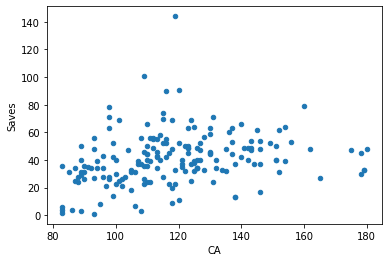

In [27]:
dfg_1.plot.scatter(x='CA', y='Saves')
plt.show()

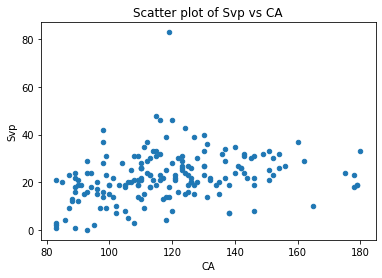

In [28]:




dfg_1.plot.scatter(x='CA', y='Svp')
plt.title('Scatter plot of Svp vs CA')
plt.show()

Text(0.5, 1.0, 'Scatter plot of Svt vs CA')

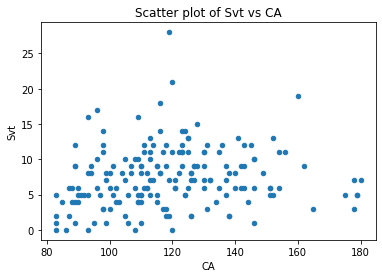

In [29]:

dfg_1.plot.scatter(x='CA', y='Svt')
plt.title('Scatter plot of Svt vs CA')

Text(0.5, 1.0, 'Scatter plot of xsv vs CA')

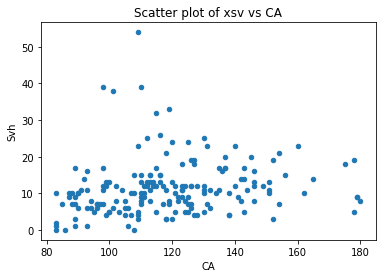

In [30]:

dfg_1.plot.scatter(x='CA', y='Svh')
plt.title('Scatter plot of xsv vs CA')

Text(0.5, 1.0, 'Scatter plot of sv% vs CA')

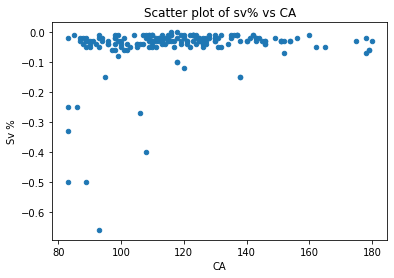

In [31]:

dfg_1.plot.scatter(x='CA', y='Sv %')
plt.title('Scatter plot of sv% vs CA')

Text(0.5, 1.0, 'Scatter plot of saves vs CA')

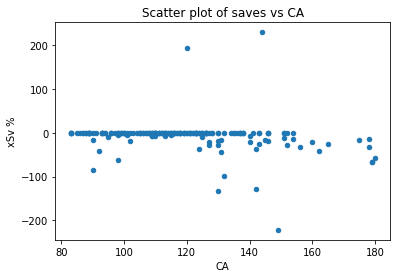

In [32]:

dfg_1.plot.scatter(x='CA', y='xSv %')
plt.title('Scatter plot of saves vs CA')

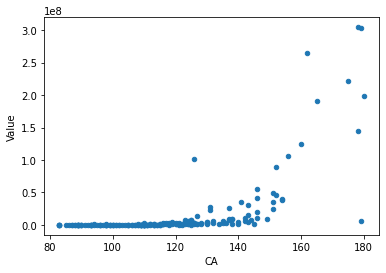

In [33]:
dfg_1.plot.scatter(x='CA', y='Value')
plt.show()

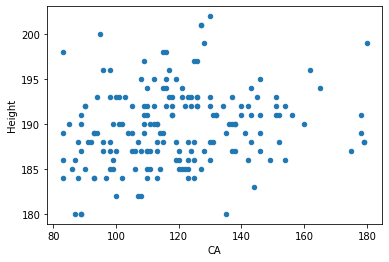

In [34]:
dfg_1.plot.scatter(x='CA', y='Height')
plt.show()

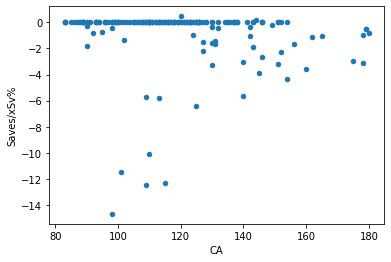

In [35]:
dfg_1.plot.scatter(x='CA', y='Saves/xSv%')
plt.show()


In [36]:
#sns.pairplot(dfg_1,palette='viridis')

In [37]:
dfg_1['Based'].value_counts()

France (Ligue 1)                                14
Italy (Serie A)                                 11
Portugal (Liga Portugal 2)                      11
France (Ligue 2)                                11
Holland (Eredivisie)                            10
Spain (LaLiga)                                   9
England (Premier League)                         9
Portugal (Primeira Liga)                         9
U.S.A. (MLS)                                     8
Croatia (Prva HNL)                               7
Italy (Serie B)                                  7
Portugal (Liga 3 Norte)                          6
Belgium (Pro League)                             5
Switzerland (Super League)                       4
Croatia (Druga HNL)                              4
Slovenia (1. SNL)                                4
Argentina (Liga Profesional)                     3
Portugal (Liga 3 Sul)                            3
Austria (Admiral Bundesliga)                     3
Croatia (3. HNL Jug)           

In [38]:
correlation = dfg_1.corr()['CA']
print(correlation)

Apps          0.158013
Mins          0.164399
Mins/Gm       0.067870
Height        0.200249
Weight        0.246615
Age           0.142440
Av Rat        0.352161
K Ps/90      -0.217373
Pas %         0.726813
Distance      0.495089
K Tck         0.080062
Fls          -0.048503
Int/90        0.055089
Con/90       -0.221291
xSv %        -0.197866
Sv %          0.235225
Svh           0.157161
Svt           0.136683
Svp           0.281403
PoM           0.318574
Tck R         0.080408
CA            1.000000
Saves         0.245999
Saves/xSv%   -0.085984
Value         0.625651
Name: CA, dtype: float64


DataSet is with 29 Features To drop some Columns Checking For Multicolinearity

In [39]:
X = dfg_1.drop("CA",axis=1)   #Feature Matrix
y = dfg_1["CA"] 

In [40]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=0)

X_train.shape, X_test.shape

((135, 25), (46, 25))

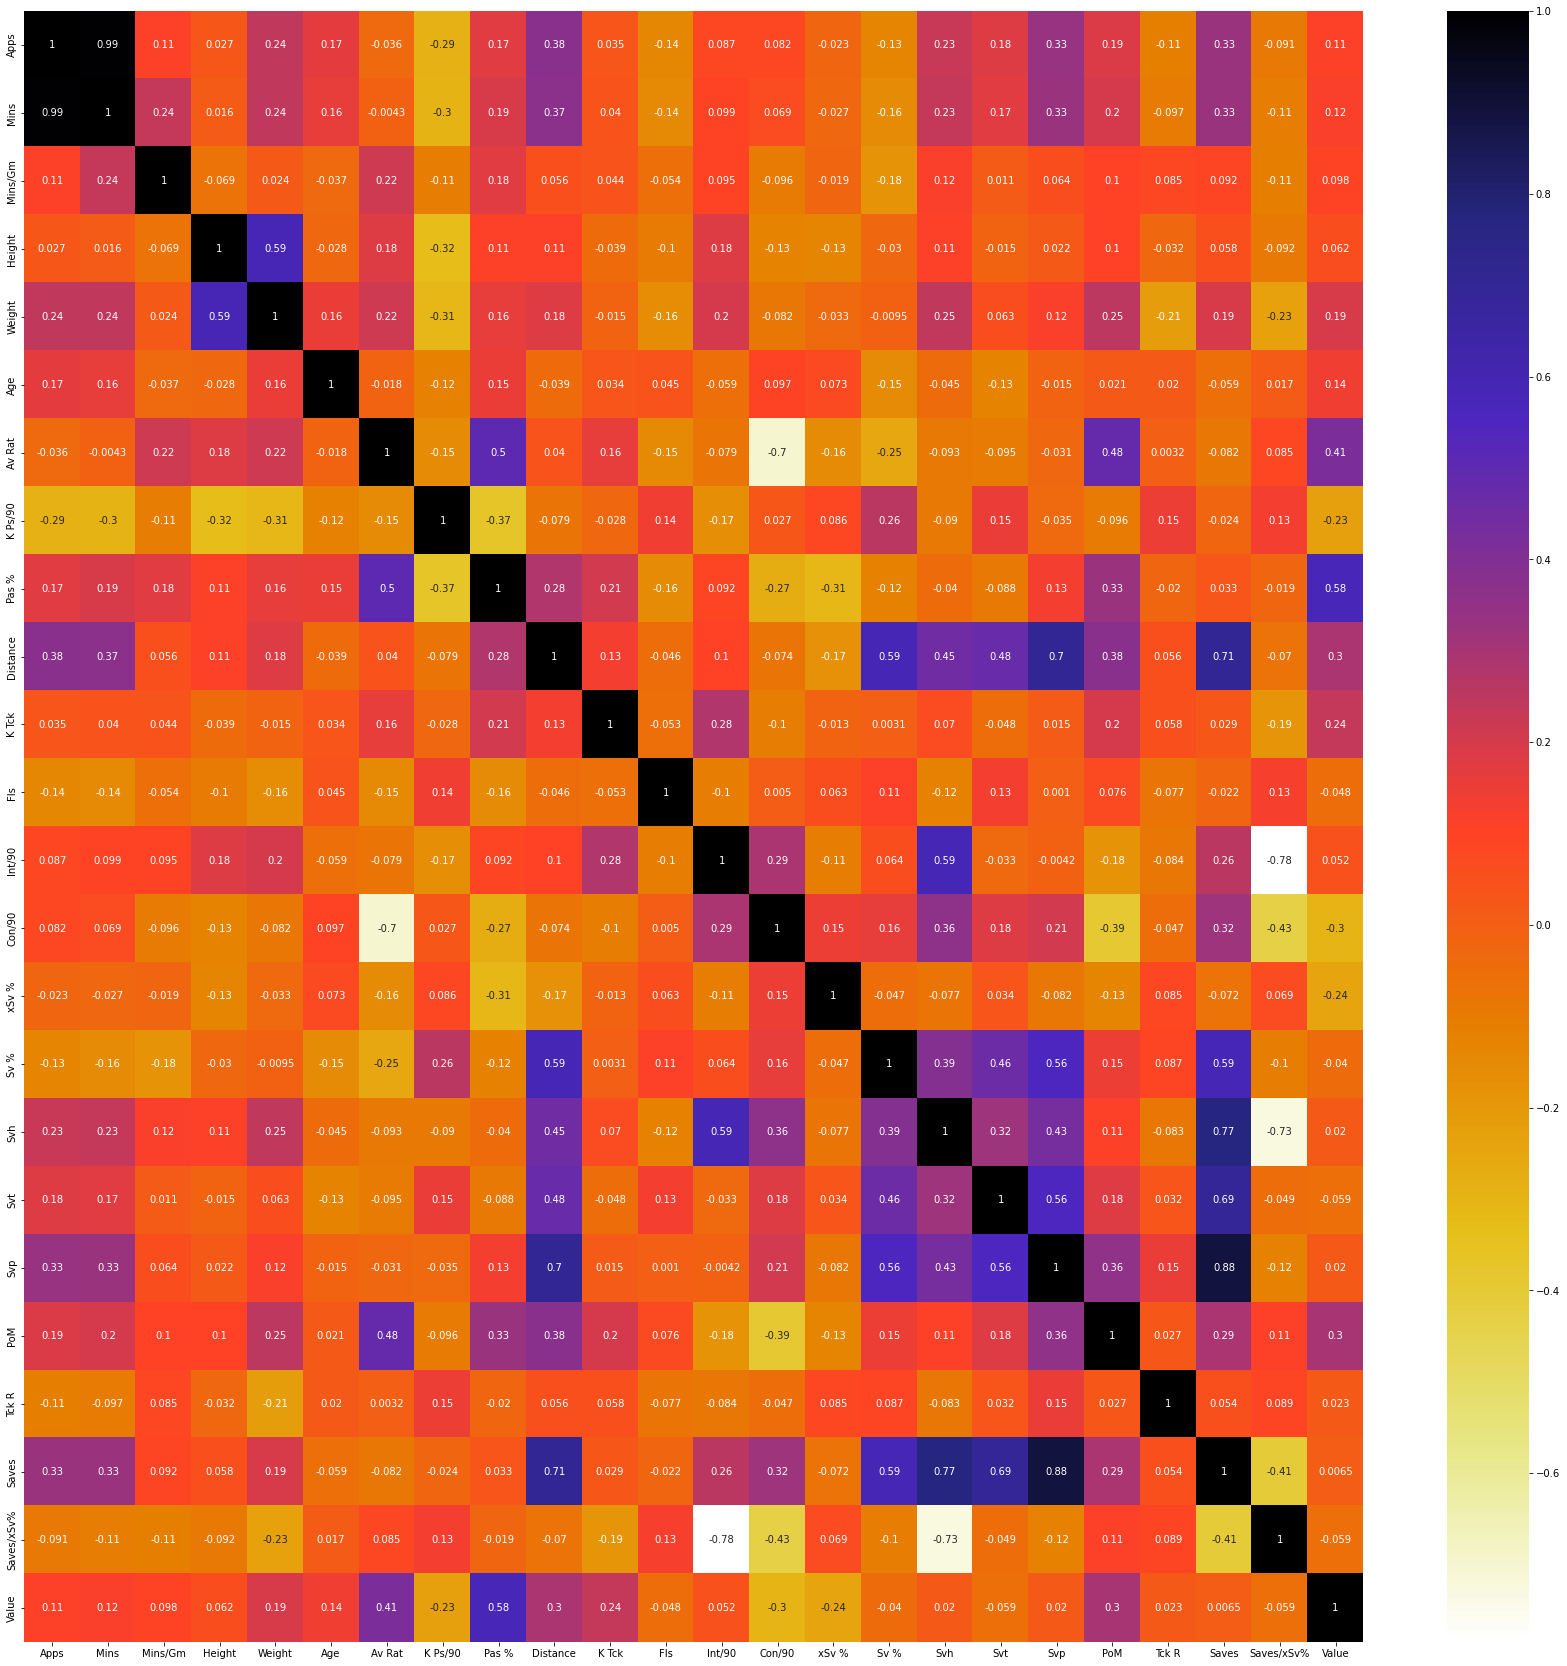

In [41]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [42]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

2

In [44]:
corr_features

{'Mins', 'Saves'}

'Mins' and 'svp' is dropping They Are Highly Correlated

In [45]:
#dfg_1

In [46]:
#dfg_1.info()

In [47]:
dfg_2=dfg_1.drop(['Mins','Svp'],axis=1)

In [48]:
dfg_2.to_csv('Goal_Keeper.csv',index=False)

Dropping Outliers


In [49]:
# calculate z-score for each column
z = np.abs(dfg_2.select_dtypes(exclude=['object']).apply(lambda x: (x - x.mean()) / x.std()))

# drop outliers for columns that are not "Based"
dfg_3 = dfg_2[(z < 3).all(axis=1)]

In [50]:
#dfg_3.corr()

In [51]:
correlation = dfg_3[['K Tck', 'CA']].corr().iloc[0, 1]
print(correlation)

nan


In [52]:
variance_penr = dfg_3['K Tck'].var()
print(variance_penr)

0.0


In [53]:
dfg_3 = dfg_3.drop(columns=['K Tck'])

In [54]:
X = dfg_3.drop("CA",axis=1)   #Feature Matrix
y = dfg_3["CA"] 

In [55]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=0)

X_train.shape, X_test.shape

((106, 22), (36, 22))

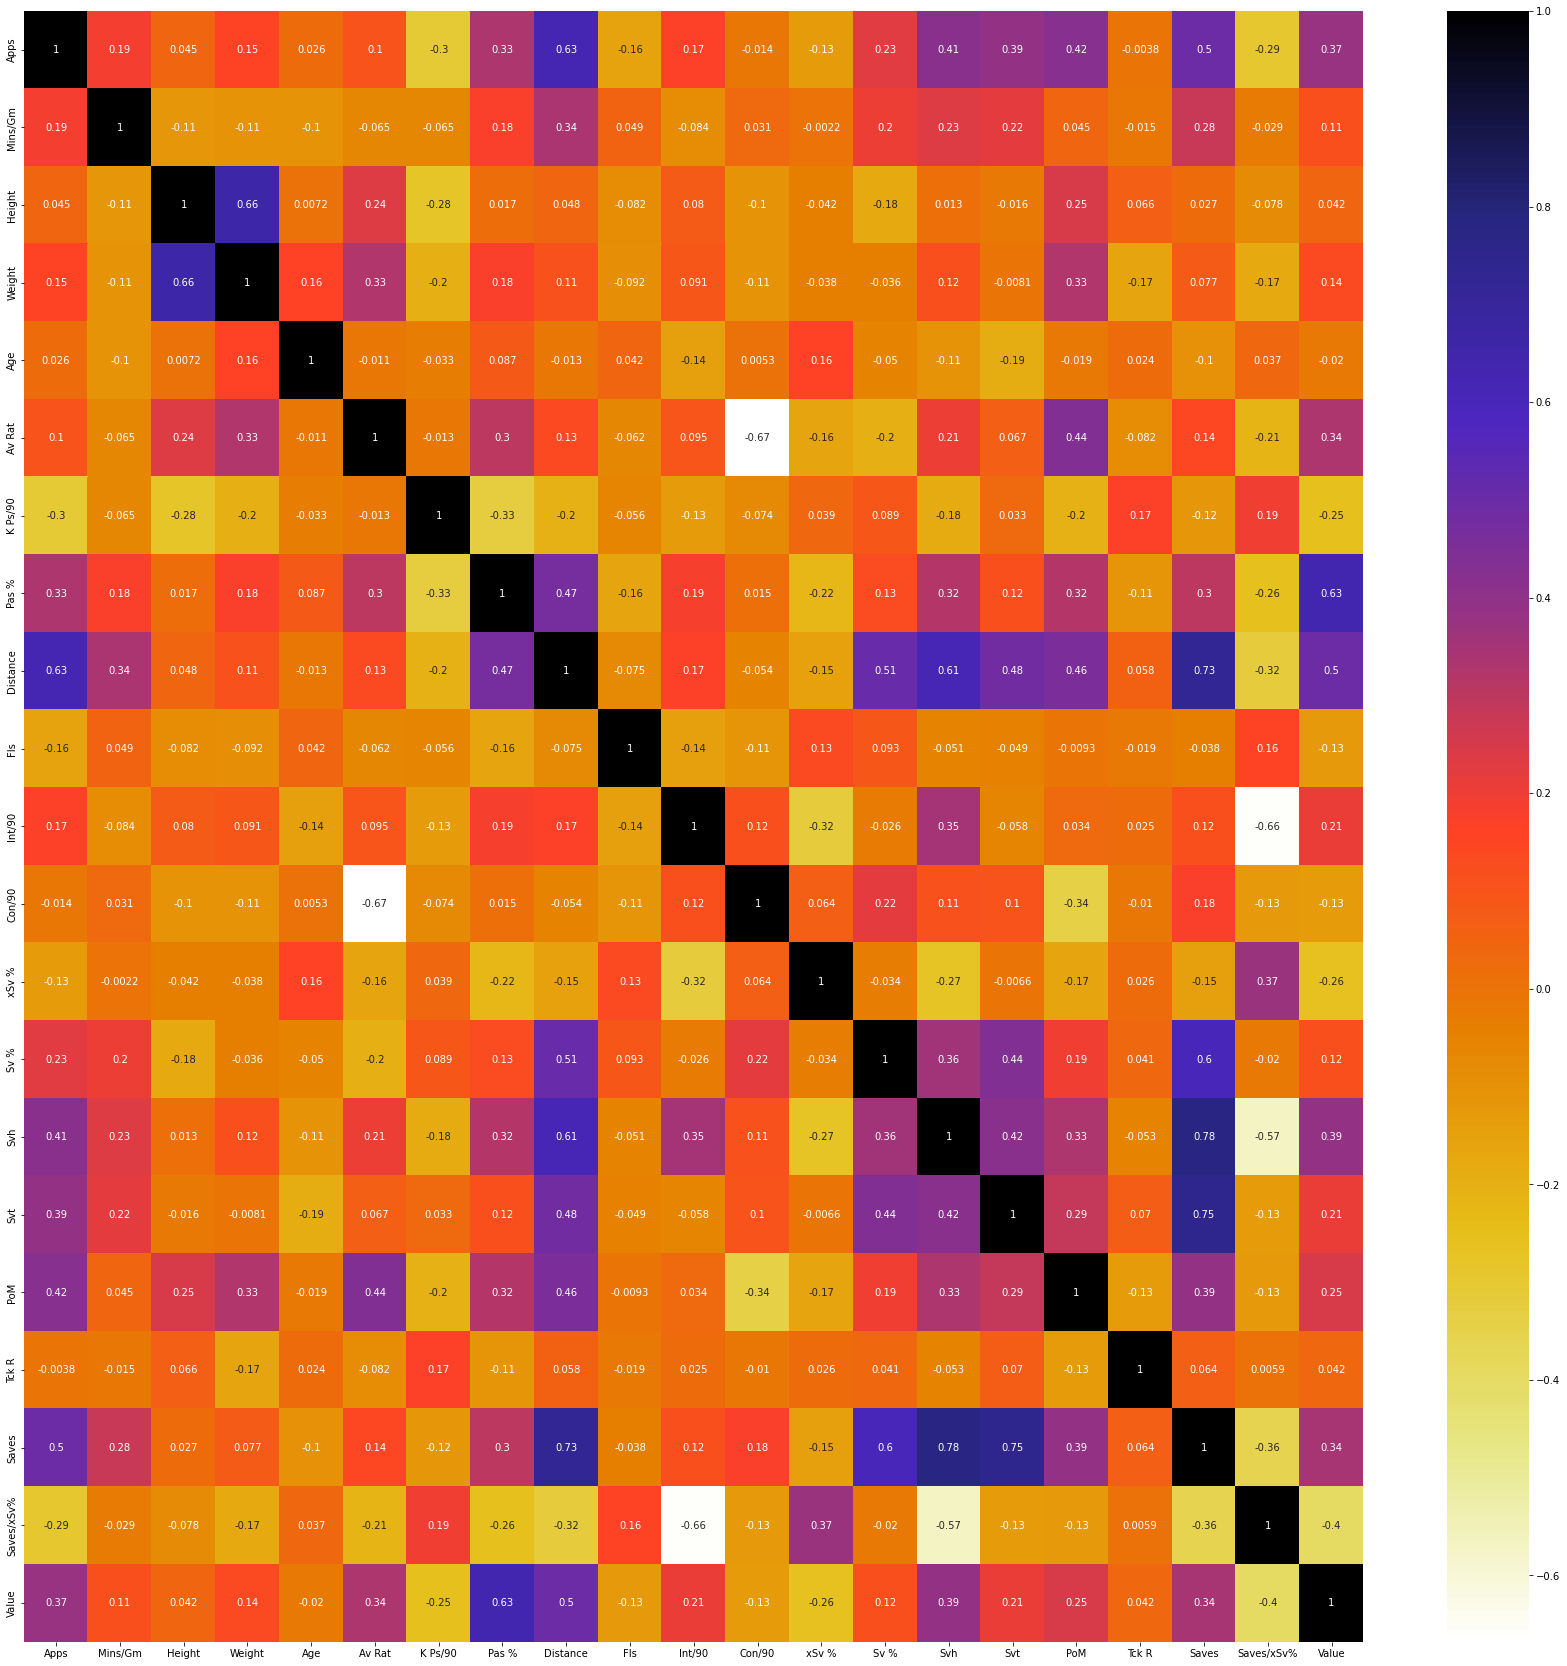

In [56]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [57]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [58]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

0

In [59]:
corr_features

set()

In [60]:
#dfg_3.var()

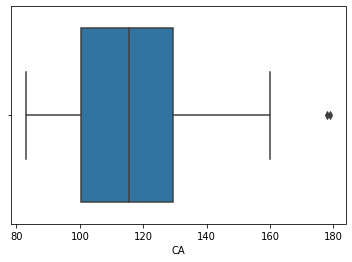

In [61]:
import seaborn as sns

sns.boxplot(x=dfg_3['CA'])
plt.show()

In [62]:
#correlation = dfg_3.corr()["CA"]
#print(correlation)

In [63]:
value_counts = dfg_3['Based'].unique()
print(value_counts)

['Croatia (Druga HNL)' 'Croatia (3. HNL Jug)' 'Croatia (3. HNL Zapad)'
 'Bosnia & Herzegovina (Liga 12)' 'Portugal (Liga 3 Norte)'
 'Portugal (Pro-Nacional - Braga)' 'Slovenia (1. SNL)'
 'Italy (Lega Nazionale Dilettanti D)' 'Portugal (Liga Portugal 2)'
 'France (National 2 Groupe A)' 'Italy (Lega Nazionale Dilettanti F)'
 'Italy (Lega Nazionale Dilettanti C)'
 'Italy (Lega Nazionale Dilettanti H)'
 'Italy (Lega Nazionale Dilettanti A)' 'Italy (Serie A)'
 'Belgium (1B Pro League)' 'Portugal (FPF Liga 3)' 'U.S.A. (MLS)'
 'France (National 2 Groupe D)' 'Portugal (Liga 3 Sul)'
 'Slovenia (2. SNL)' 'Portugal (Primeira Liga)' 'Holland (Eredivisie)'
 'Norway (Eliteserien)' 'Italy (Serie C/B)' 'France (National 2 Groupe C)'
 'Austria (ADMIRAL 2. Liga)' 'France (Ligue 2)'
 'France (National 2 Groupe B)' 'Croatia (Prva HNL)'
 'Italy (Lega Nazionale Dilettanti E)' 'Argentina (Liga Profesional)'
 'Austria (Admiral Bundesliga)' 'Romania (Liga I)' 'Belgium (Pro League)'
 'Switzerland (Super League)

In [64]:
dfg_4 = dfg_3.drop(columns=["Based"], axis=1)

Feature Selection

Mutual Information


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dfg_4.drop(labels=['CA'], axis=1),
    dfg_4['CA'],
    test_size=0.3,
    random_state=101)

In [66]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.15468933, 0.        , 0.03653862, 0.04723122, 0.0635894 ,
       0.05376518, 0.13607842, 0.42244053, 0.19633712, 0.        ,
       0.02647999, 0.        , 0.05826374, 0.08758214, 0.22780086,
       0.        , 0.22788311, 0.02670938, 0.09925789, 0.14088207,
       0.5288241 ])

In [67]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=True)

Mins/Gm       0.000000
Fls           0.000000
Con/90        0.000000
Svt           0.000000
Int/90        0.026480
Tck R         0.026709
Height        0.036539
Weight        0.047231
Av Rat        0.053765
xSv %         0.058264
Age           0.063589
Sv %          0.087582
Saves         0.099258
K Ps/90       0.136078
Saves/xSv%    0.140882
Apps          0.154689
Distance      0.196337
Svh           0.227801
PoM           0.227883
Pas %         0.422441
Value         0.528824
dtype: float64

Univariate Selection

In [68]:
X = dfg_4.drop("CA",axis=1)   #Feature Matrix
y = dfg_4["CA"] 

In [69]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [70]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.01092643 0.00870609 0.01715678 0.00837856 0.02098044 0.0128234
 0.0107831  0.37081563 0.07842415 0.0097963  0.00396109 0.01039085
 0.01755434 0.03318537 0.01280376 0.01317337 0.01235364 0.01187619
 0.0237907  0.01858649 0.29353334]


In [71]:
mutual_info = pd.Series(model.feature_importances_)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Pas %         0.370816
Value         0.293533
Distance      0.078424
Sv %          0.033185
Saves         0.023791
Age           0.020980
Saves/xSv%    0.018586
xSv %         0.017554
Height        0.017157
Svt           0.013173
Av Rat        0.012823
Svh           0.012804
PoM           0.012354
Tck R         0.011876
Apps          0.010926
K Ps/90       0.010783
Con/90        0.010391
Fls           0.009796
Mins/Gm       0.008706
Weight        0.008379
Int/90        0.003961
dtype: float64

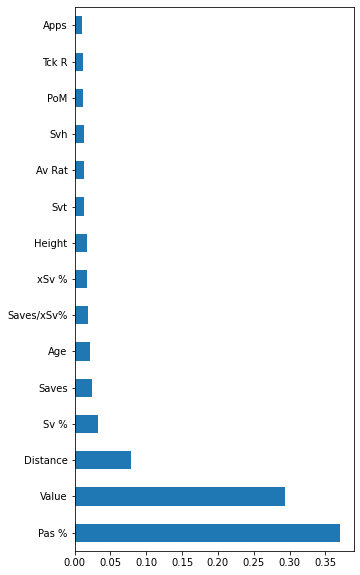

In [72]:

#plot graph of feature importances for better visualization
plt.figure(figsize=(5,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [73]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
from lazypredict.Supervised import LazyRegressor

In [75]:
X = dfg_4.drop("CA",axis=1)   #Feature Matrix
y = dfg_4["CA"] 

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [78]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:01<00:00, 26.30it/s]

[03:57:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          0.61       0.80   7.71   
XGBRegressor                                 0.56       0.78   8.18   
GradientBoostingRegressor                    0.53       0.76   8.43   
HistGradientBoostingRegressor                0.51       0.76   8.58   
RandomForestRegressor                        0.49       0.75   8.73   
LGBMRegressor                                0.48       0.74   8.86   
AdaBoostRegressor                            0.45       0.73   9.07   
BayesianRidge                                0.40       0.70   9.54   
RidgeCV                                      0.39       0.69   9.63   
ElasticNet                                   0.38       0.69   9.67   
ElasticNetCV         

In [79]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.61,0.80,7.71,0.13
XGBRegressor,0.56,0.78,8.18,0.11
GradientBoostingRegressor,0.53,0.76,8.43,0.06
HistGradientBoostingRegressor,0.51,0.76,8.58,0.08
RandomForestRegressor,0.49,0.75,8.73,0.16
LGBMRegressor,0.48,0.74,8.86,0.03
AdaBoostRegressor,0.45,0.73,9.07,0.08
BayesianRidge,0.40,0.70,9.54,0.05
RidgeCV,0.39,0.69,9.63,0.01


In [80]:
# Lets perform Feature selection using Anova or F-Test Linear Regression sklearn 
from sklearn.feature_selection import f_regression, SelectKBest

In [81]:
# apply SelectKBest class to extract top 30 best features
fs = SelectKBest(score_func=f_regression,k=15) ## Select k as per your business understaing
# Apply feature selection
fit = fs.fit(X,y)

In [82]:
print(np.round(fit.pvalues_,4))
print(np.round(fit.scores_,3))

[0.000e+00 2.077e-01 3.300e-02 9.000e-04 7.430e-02 0.000e+00 3.100e-03
 0.000e+00 0.000e+00 2.111e-01 1.580e-02 3.677e-01 6.100e-03 4.100e-03
 0.000e+00 1.370e-02 1.000e-04 2.977e-01 0.000e+00 0.000e+00 0.000e+00]
[ 18.337   1.602   4.639  11.421   3.234  18.238   9.05  166.595  76.678
   1.578   5.969   0.817   7.766   8.508  20.416   6.231  16.018   1.092
  28.958  21.815  77.548]


In [83]:
features_score = pd.DataFrame(fit.scores_)
features_pvalue = pd.DataFrame(np.round(fit.pvalues_,4))
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score,features_pvalue],axis=1)
# Assign the column name
feature_score.columns = ["Input_Features","F_Score","P_Value"]
print(feature_score.nlargest(21,columns="F_Score"))

   Input_Features  F_Score  P_Value
7           Pas %   166.60     0.00
20          Value    77.55     0.00
8        Distance    76.68     0.00
18          Saves    28.96     0.00
19     Saves/xSv%    21.82     0.00
14            Svh    20.42     0.00
0            Apps    18.34     0.00
5          Av Rat    18.24     0.00
16            PoM    16.02     0.00
3          Weight    11.42     0.00
6         K Ps/90     9.05     0.00
13           Sv %     8.51     0.00
12          xSv %     7.77     0.01
15            Svt     6.23     0.01
10         Int/90     5.97     0.02
2          Height     4.64     0.03
4             Age     3.23     0.07
1         Mins/Gm     1.60     0.21
9             Fls     1.58     0.21
17          Tck R     1.09     0.30
11         Con/90     0.82     0.37


In [84]:
corr_matrix=dfg_4.corr()
corr_matrix["CA"].sort_values(ascending=False)

CA            1.00
Pas %         0.74
Value         0.60
Distance      0.59
Saves         0.41
Svh           0.36
Apps          0.34
Av Rat        0.34
PoM           0.32
Weight        0.27
Sv %          0.24
Svt           0.21
Int/90        0.20
Height        0.18
Age           0.15
Mins/Gm       0.11
Tck R         0.09
Con/90       -0.08
Fls          -0.11
xSv %        -0.23
K Ps/90      -0.25
Saves/xSv%   -0.37
Name: CA, dtype: float64

In [85]:
# Apply the Mutual Regression
from sklearn.feature_selection import mutual_info_regression
mir = mutual_info_regression(X,y)
mrs_score = pd.Series(mir,index=X.columns)
mrs_score.sort_values(ascending=True)

Weight       0.00
Tck R        0.00
Fls          0.00
Con/90       0.00
Svt          0.01
Mins/Gm      0.02
xSv %        0.04
Int/90       0.04
Av Rat       0.06
Age          0.06
Height       0.07
Saves        0.07
K Ps/90      0.12
Sv %         0.13
PoM          0.15
Saves/xSv%   0.16
Apps         0.17
Svh          0.20
Distance     0.24
Pas %        0.46
Value        0.58
dtype: float64

In [86]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [88]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [89]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from xgboost import XGBRegressor
model = XGBRegressor()


[03:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:57:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

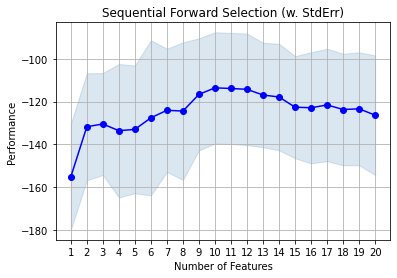

In [90]:
sfs = SFS(model, 
          k_features=20,#'best', 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)
sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')
print("Selected Features :", sfs.k_feature_names_)
print("Selected Features ID :", sfs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [91]:
df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
df[["feature_idx","avg_score"]]

,feature_idx,avg_score
1,"(20,)",-155.25
2,"(4, 20)",-131.77
3,"(4, 10, 20)",-130.49
4,"(3, 4, 10, 20)",-133.63
5,"(2, 3, 4, 10, 20)",-133.02
6,"(2, 3, 4, 7, 10, 20)",-127.60
7,"(2, 3, 4, 7, 10, 19, 20)",-124.08
8,"(2, 3, 4, 7, 8, 10, 19, 20)",-124.44
9,"(2, 3, 4, 5, 7, 8, 10, 19, 20)",-116.62
10,"(2, 3, 4, 5, 7, 8, 10, 13, 19, 20)",-113.57


In [92]:
dfg_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 180
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Apps        142 non-null    float64
 1   Mins/Gm     142 non-null    float64
 2   Height      142 non-null    float64
 3   Weight      142 non-null    float64
 4   Age         142 non-null    int64  
 5   Av Rat      142 non-null    float64
 6   K Ps/90     142 non-null    float64
 7   Pas %       142 non-null    float64
 8   Distance    142 non-null    float64
 9   Fls         142 non-null    float64
 10  Int/90      142 non-null    float64
 11  Con/90      142 non-null    float64
 12  xSv %       142 non-null    float64
 13  Sv %        142 non-null    float64
 14  Svh         142 non-null    float64
 15  Svt         142 non-null    float64
 16  PoM         142 non-null    float64
 17  Tck R       142 non-null    float64
 18  CA          142 non-null    int64  
 19  Saves       142 non-null    f

In [93]:
(2, 3, 4, 5, 7, 8, 10, 12, 13, 19, 20)

(2, 3, 4, 5, 7, 8, 10, 12, 13, 19, 20)

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor as XGB
model = XGBRegressor()


from mlxtend.feature_selection import ExhaustiveFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection

In [95]:
efs = ExhaustiveFeatureSelector(
           #knn(n_neighbors=3),
           #rfc(n_jobs=8),
           XGB(max_iter=100),
           min_features=1, 
           max_features=10, 
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers,
           n_jobs=8,
           cv=3)

In [96]:
feature_names = tuple(X.columns)
feature_names

('Apps',
 'Mins/Gm',
 'Height',
 'Weight',
 'Age',
 'Av Rat',
 'K Ps/90',
 'Pas %',
 'Distance',
 'Fls',
 'Int/90',
 'Con/90',
 'xSv %',
 'Sv %',
 'Svh',
 'Svt',
 'PoM',
 'Tck R',
 'Saves',
 'Saves/xSv%',
 'Value')

In [97]:
dfg_4.drop(labels=["Tck R", "Fls", "Con/90", "Mins/Gm"], axis=1, inplace=True)

In [98]:
dfg_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 180
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Apps        142 non-null    float64
 1   Height      142 non-null    float64
 2   Weight      142 non-null    float64
 3   Age         142 non-null    int64  
 4   Av Rat      142 non-null    float64
 5   K Ps/90     142 non-null    float64
 6   Pas %       142 non-null    float64
 7   Distance    142 non-null    float64
 8   Int/90      142 non-null    float64
 9   xSv %       142 non-null    float64
 10  Sv %        142 non-null    float64
 11  Svh         142 non-null    float64
 12  Svt         142 non-null    float64
 13  PoM         142 non-null    float64
 14  CA          142 non-null    int64  
 15  Saves       142 non-null    float64
 16  Saves/xSv%  142 non-null    float64
 17  Value       142 non-null    float64
dtypes: float64(16), int64(2)
memory usage: 21.1 KB


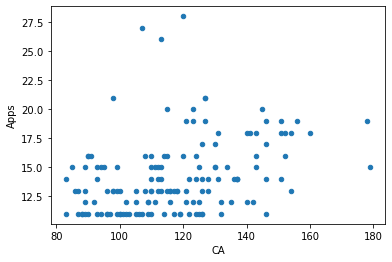

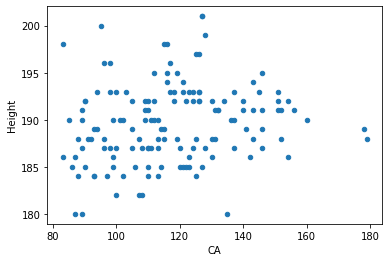

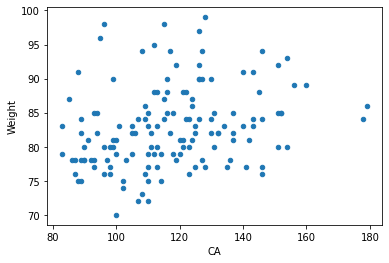

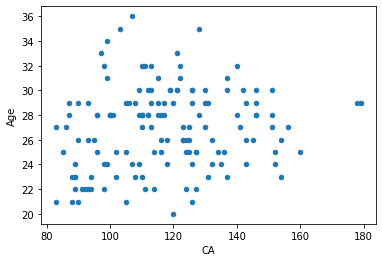

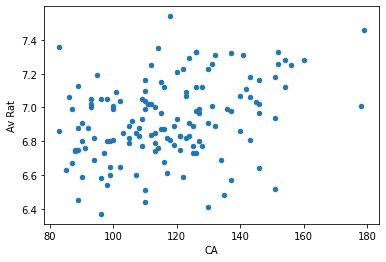

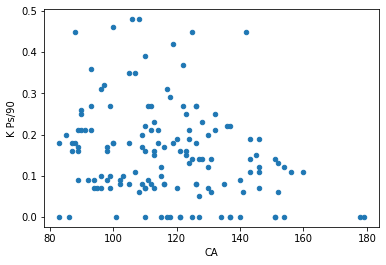

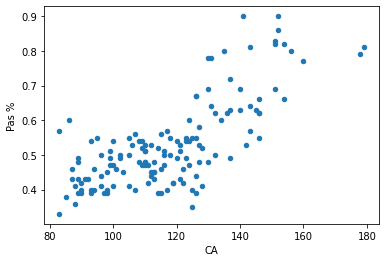

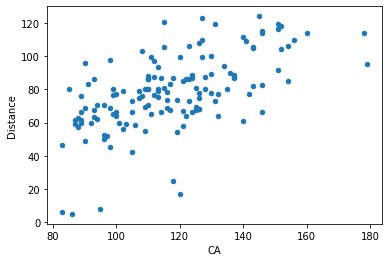

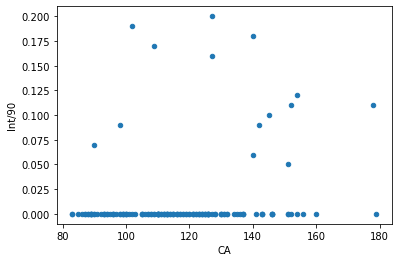

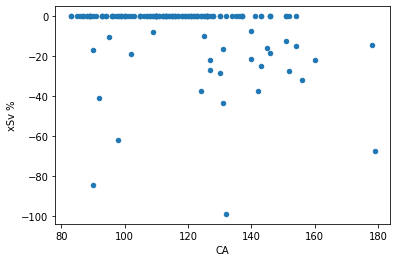

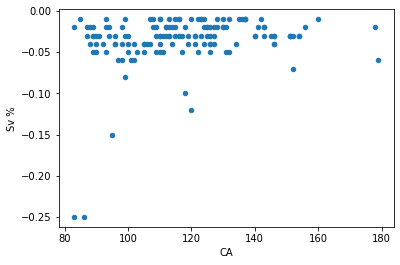

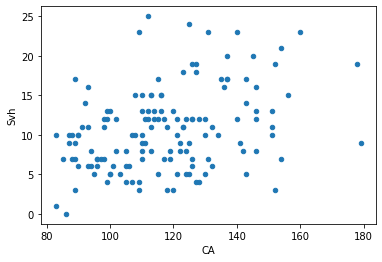

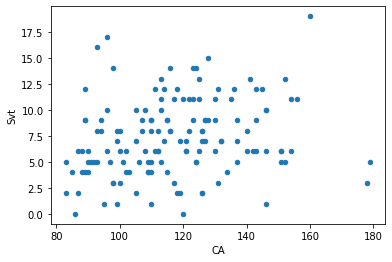

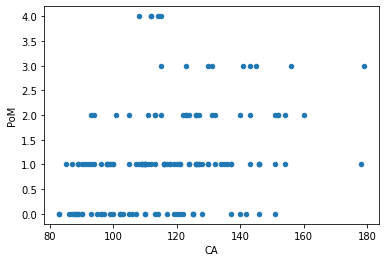

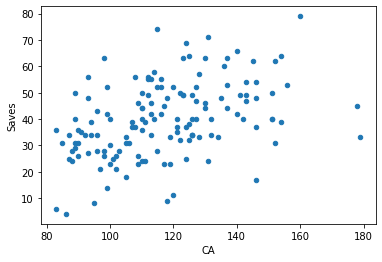

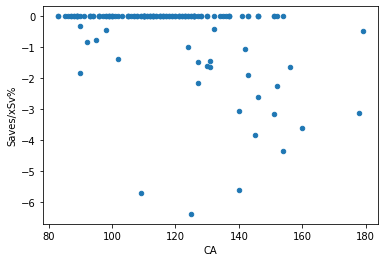

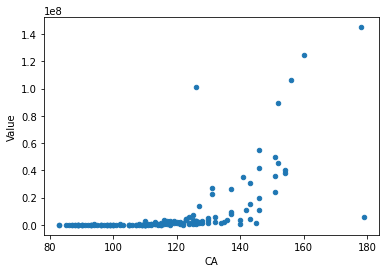

In [99]:
import matplotlib.pyplot as plt

# Loop over all the columns in the DataFrame
for column in dfg_4.columns:
    if column == "CA":
        continue
    dfg_4.plot(kind='scatter', x='CA', y=column)

# Show the plot
plt.show()

In [100]:
from lazypredict.Supervised import LazyRegressor

In [101]:
X = dfg_4.drop("CA",axis=1)   #Feature Matrix
y = dfg_4["CA"]

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [104]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [00:01<00:00, 28.59it/s]

[03:58:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          0.64       0.79   8.01   
XGBRegressor                                 0.64       0.78   8.05   
HistGradientBoostingRegressor                0.62       0.77   8.30   
GradientBoostingRegressor                    0.61       0.77   8.33   
RandomForestRegressor                        0.60       0.76   8.50   
LGBMRegressor                                0.58       0.75   8.67   
BayesianRidge                                0.54       0.72   9.13   
RidgeCV                                      0.53       0.72   9.19   
DecisionTreeRegressor                        0.52       0.71   9.28   
AdaBoostRegressor                            0.51       0.71   9.37   
ElasticNetCV         

In [105]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.64,0.79,8.01,0.10
XGBRegressor,0.64,0.78,8.05,0.03
HistGradientBoostingRegressor,0.62,0.77,8.30,0.11
GradientBoostingRegressor,0.61,0.77,8.33,0.06
RandomForestRegressor,0.60,0.76,8.50,0.19
LGBMRegressor,0.58,0.75,8.67,0.02
BayesianRidge,0.54,0.72,9.13,0.01
RidgeCV,0.53,0.72,9.19,0.02
DecisionTreeRegressor,0.52,0.71,9.28,0.01


In [106]:
X = dfg_4.drop("CA",axis=1)   #Feature Matrix
y = dfg_4["CA"]

In [107]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=0)

X_train.shape, X_test.shape

((106, 17), (36, 17))

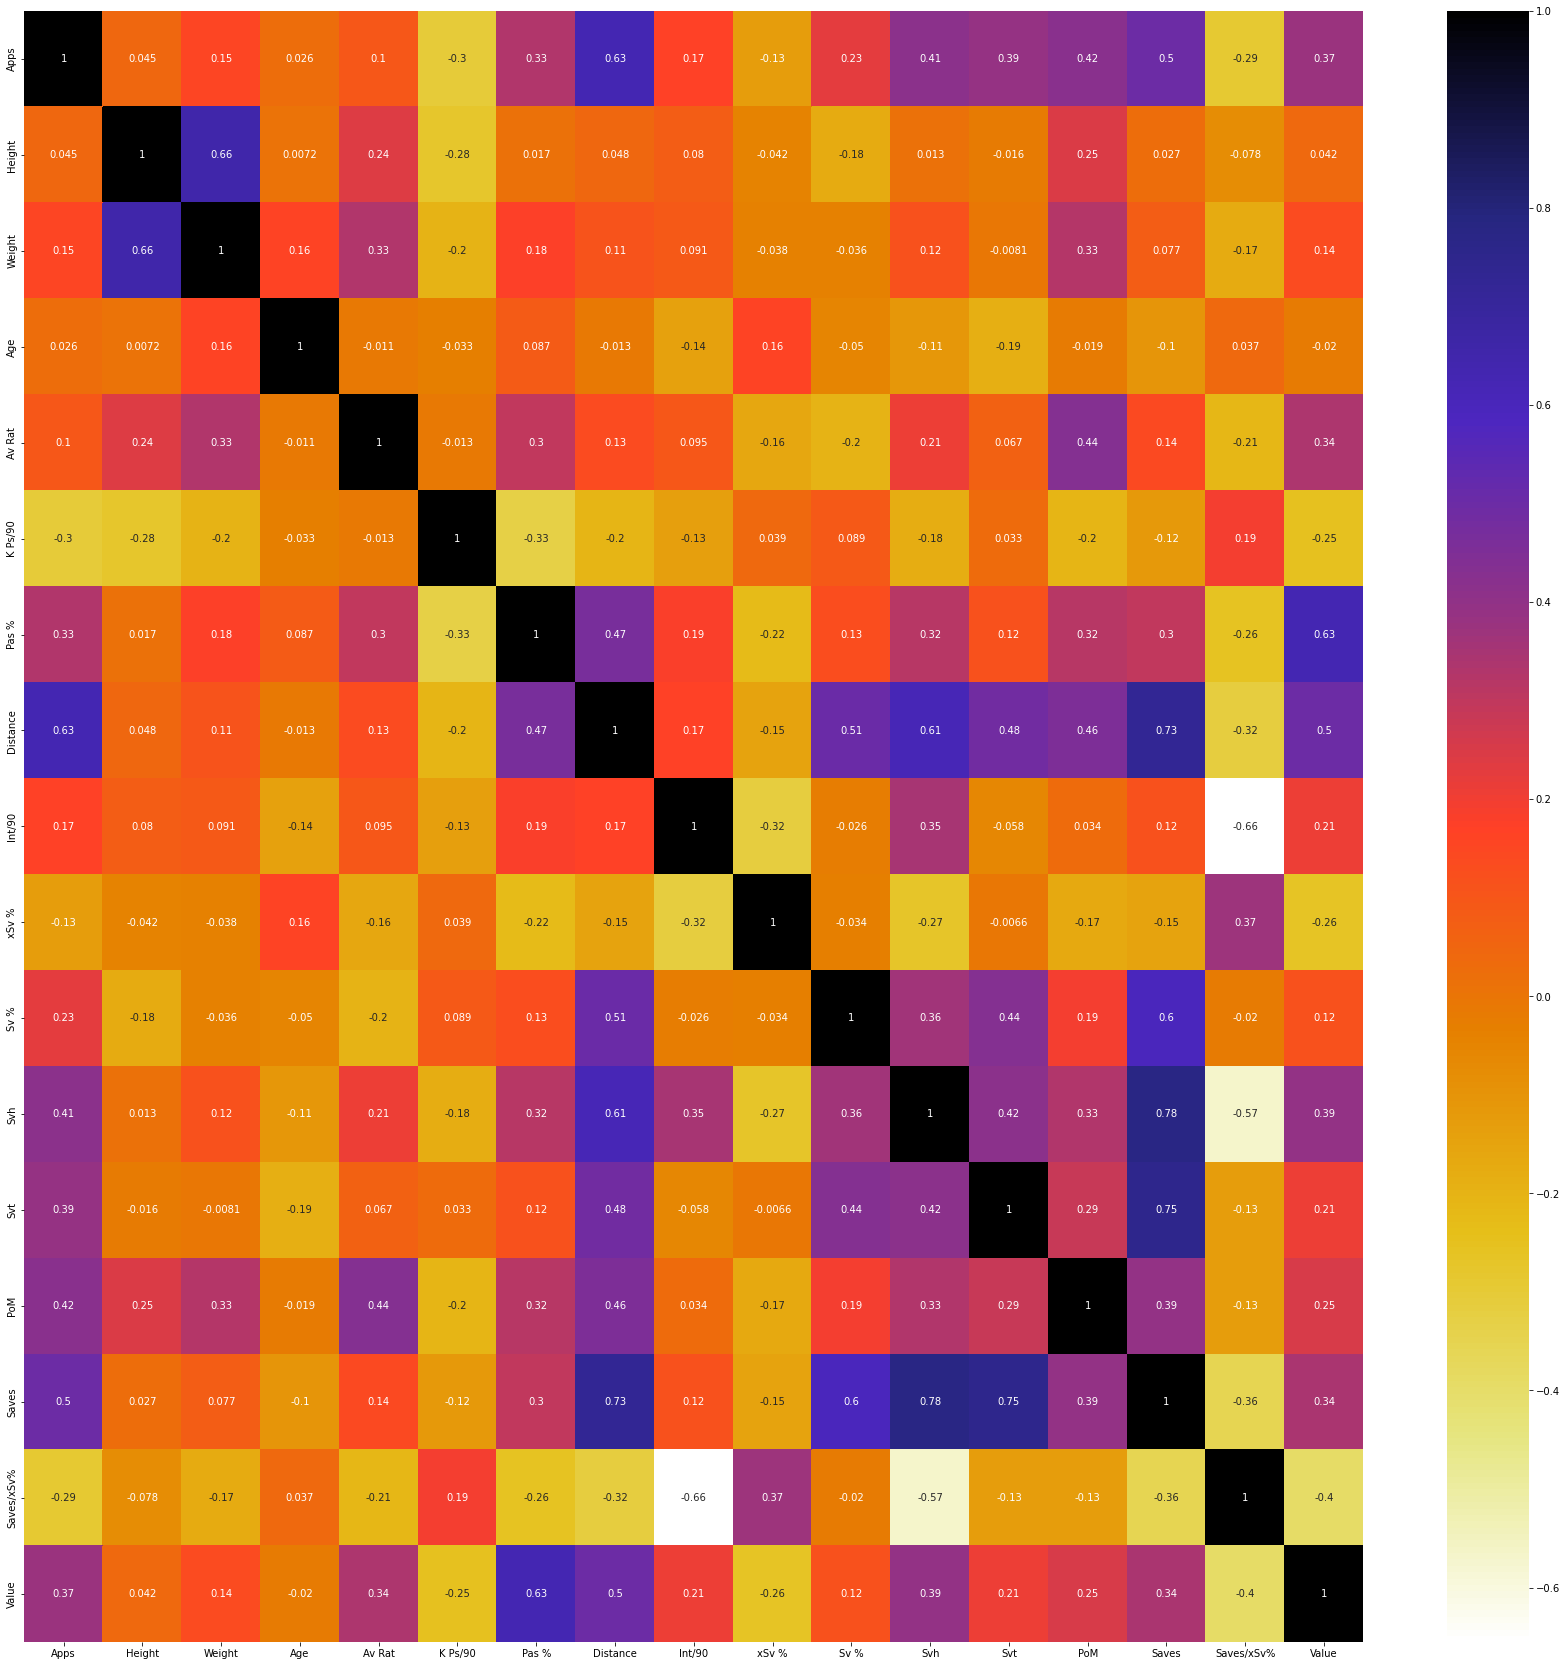

In [108]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [109]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [110]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

1

In [111]:
corr_features

{'Saves'}

In [112]:
dfg_4

,Apps,Height,Weight,Age,Av Rat,K Ps/90,Pas %,Distance,Int/90,xSv %,Sv %,Svh,Svt,PoM,CA,Saves,Saves/xSv%,Value
0,12.00,188.00,78.00,22,6.88,0.09,0.43,60.00,0.00,-40.96,-0.04,14.00,5.00,1.00,92,34.00,-0.83,27500.00
1,15.00,190.00,87.00,25,6.63,0.20,0.38,80.10,0.00,0.00,-0.01,7.00,4.00,1.00,85,31.00,0.00,4000.00
2,11.00,188.00,91.00,23,6.75,0.18,0.36,62.70,0.00,0.00,-0.04,10.00,6.00,0.00,88,28.00,0.00,20000.00
6,16.00,192.00,80.00,21,6.80,0.26,0.40,68.50,0.07,-16.96,-0.04,6.00,6.00,0.00,90,31.00,-1.83,35000.00
8,15.00,200.00,96.00,26,7.19,0.07,0.55,7.80,0.00,-10.60,-0.15,5.00,1.00,0.00,95,8.00,-0.75,9750.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,14.00,193.00,85.00,30,6.52,0.14,0.83,91.60,0.00,0.00,-0.03,13.00,6.00,0.00,151,40.00,0.00,24000000.00
172,17.00,187.00,77.00,28,7.16,0.12,0.66,115.10,0.00,0.00,-0.04,13.00,10.00,0.00,146,54.00,0.00,55000000.00
174,16.00,188.00,85.00,25,7.33,0.13,0.86,104.40,0.00,0.00,-0.07,3.00,5.00,2.00,152,31.00,0.00,45500000.00
176,14.00,195.00,94.00,29,6.64,0.07,0.62,82.80,0.00,0.00,-0.03,12.00,6.00,1.00,146,37.00,0.00,11200000.00


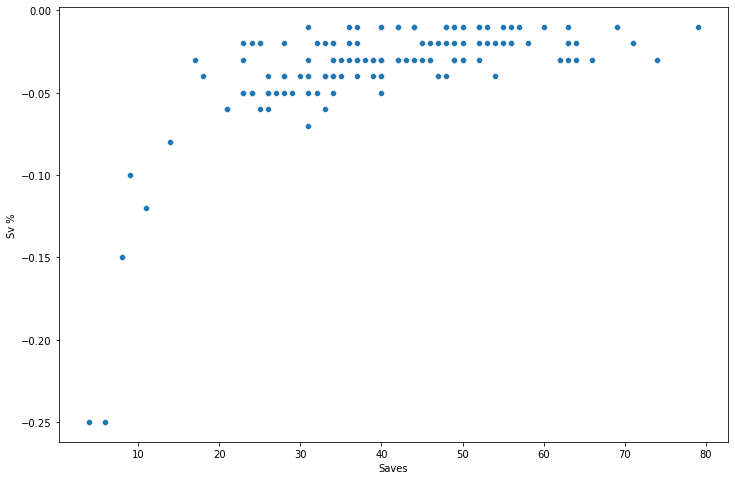

In [113]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Saves',y='Sv %',data=dfg_4)

<Figure size 864x576 with 0 Axes>

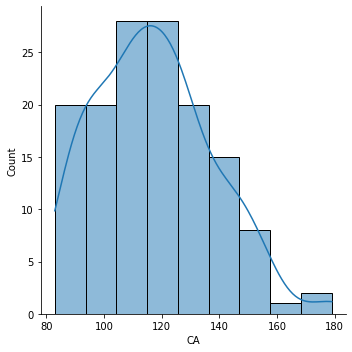

In [114]:
plt.figure(figsize=(12,8))
sns.displot(data=dfg_4,x='CA',kde=True)

In [115]:
dfg_4

,Apps,Height,Weight,Age,Av Rat,K Ps/90,Pas %,Distance,Int/90,xSv %,Sv %,Svh,Svt,PoM,CA,Saves,Saves/xSv%,Value
0,12.00,188.00,78.00,22,6.88,0.09,0.43,60.00,0.00,-40.96,-0.04,14.00,5.00,1.00,92,34.00,-0.83,27500.00
1,15.00,190.00,87.00,25,6.63,0.20,0.38,80.10,0.00,0.00,-0.01,7.00,4.00,1.00,85,31.00,0.00,4000.00
2,11.00,188.00,91.00,23,6.75,0.18,0.36,62.70,0.00,0.00,-0.04,10.00,6.00,0.00,88,28.00,0.00,20000.00
6,16.00,192.00,80.00,21,6.80,0.26,0.40,68.50,0.07,-16.96,-0.04,6.00,6.00,0.00,90,31.00,-1.83,35000.00
8,15.00,200.00,96.00,26,7.19,0.07,0.55,7.80,0.00,-10.60,-0.15,5.00,1.00,0.00,95,8.00,-0.75,9750.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,14.00,193.00,85.00,30,6.52,0.14,0.83,91.60,0.00,0.00,-0.03,13.00,6.00,0.00,151,40.00,0.00,24000000.00
172,17.00,187.00,77.00,28,7.16,0.12,0.66,115.10,0.00,0.00,-0.04,13.00,10.00,0.00,146,54.00,0.00,55000000.00
174,16.00,188.00,85.00,25,7.33,0.13,0.86,104.40,0.00,0.00,-0.07,3.00,5.00,2.00,152,31.00,0.00,45500000.00
176,14.00,195.00,94.00,29,6.64,0.07,0.62,82.80,0.00,0.00,-0.03,12.00,6.00,1.00,146,37.00,0.00,11200000.00


Decision Tree Regressor


In [116]:
X = dfg_4.drop("CA",axis=1)   #Feature Matrix
y = dfg_4["CA"]

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [118]:
param_grid = {'max_depth': [5, 10, 15, 20],
              'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10],
              'max_features': [5, 10, 15, 17]}

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor()
grid_search = GridSearchCV(dt, param_grid, cv=5)

In [120]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [5, 10, 15, 17],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]})

In [121]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error,: ", mse,)


Mean Squared Error,:  147.92126656697164


In [122]:
best_dt

DecisionTreeRegressor(max_depth=5, max_features=10, min_samples_leaf=5,
                      min_samples_split=5)

In [123]:
# Get the feature importances
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5, max_features=10, min_samples_leaf=10)
dt.fit(X_train, y_train)
# Get the feature importances
importances = dt.feature_importances_

# Sort the features by their importance
sorted_index = np.argsort(importances)[::-1]

# Print the best features
for i in sorted_index:
    print(f"{X.columns[i]}: {importances[i]}")

Value: 0.7961194376399431
Pas %: 0.17207507488801133
Saves/xSv%: 0.017685150585602244
Distance: 0.014120336886443426
Height: 0.0
Weight: 0.0
Age: 0.0
Av Rat: 0.0
K Ps/90: 0.0
Int/90: 0.0
xSv %: 0.0
Sv %: 0.0
Svh: 0.0
Svt: 0.0
PoM: 0.0
Saves: 0.0
Apps: 0.0


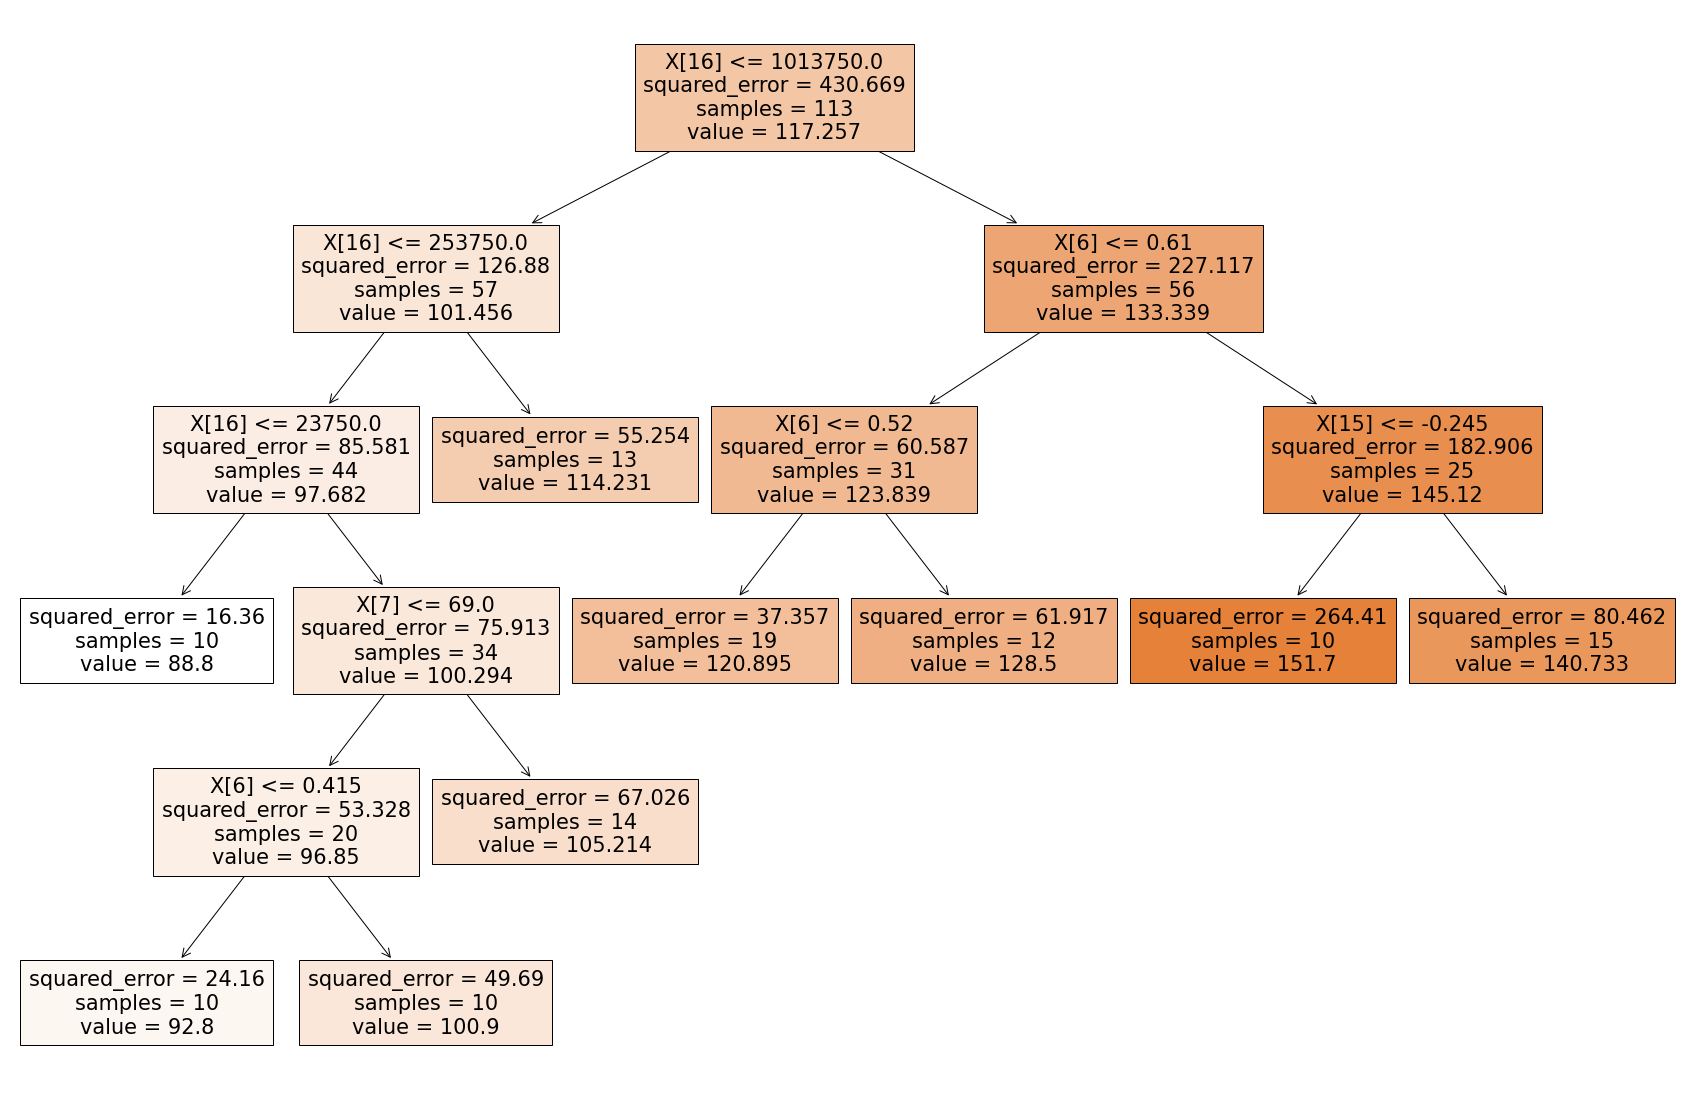

In [124]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(30,20))
tree.plot_tree(dt, filled=True)
plt.show()

In [125]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict the target variable for the test set
y_pred = dt.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 10.813087069976001


In [126]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
trees = [10,50,100]
for n in trees:
    
    model = RandomForestRegressor(n_estimators=n)
    
    run_model(model,X_train,y_train,X_test,y_test)
    print(n)

RMSE : 11.15022807869402
10
RMSE : 9.38543332088027
50
RMSE : 9.527216730015626
100


In [129]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],'bootstrap':[True,False],'oob_score':[True,False]}

 

In [130]:
rf = RandomForestRegressor()

# Wrap the regressor with GridSearchCV and specify the hyperparameters to search through
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [131]:
#grid_search.fit(X_train, y_train)

In [132]:
#print("Best hyperparameters found: ", grid_search.best_params_)


In [133]:
# Replace 'your_metric' with the appropriate performance metric, such as mean squared error or R^2 score
#print("Performance on test data: ", grid_search.score(X_test, y_test))


In [134]:
# Replace 'X_test' and 'y_test' with the test features and target variables, respectively
#y_pred = grid_search.predict(X_test)

# Replace 'your_metric' with the appropriate performance metric, such as mean squared error or R^2 score
#accuracy = grid_search.score(X_test, y_test)
#print("Accuracy: ", accuracy)


In [135]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
ada = AdaBoostRegressor()

In [138]:
param_grid = {'n_estimators': [50, 100, 150, 200, 250],
              'learning_rate': [0.01, 0.05, 0.1, 0.3, 1]}


In [139]:
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5)

In [140]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [141]:
best_params = grid_search.best_params_

In [142]:
best_params

{'learning_rate': 0.3, 'n_estimators': 50}

In [143]:
ada = AdaBoostRegressor(n_estimators=best_params['n_estimators'], learning_rate=best_params['learning_rate'])
ada.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.3)

In [144]:
y_pred = ada.predict(X_test)

In [145]:
mse = mean_squared_error(y_test, y_pred)

In [146]:
mae=mean_absolute_error(y_test, y_pred)

In [147]:
from sklearn.metrics import mean_squared_error, r2_score

In [148]:
accuracy = r2_score(y_test, y_pred)

In [149]:
print("Best Parameters: ", best_params)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("Accuracy: ", accuracy)
print("mae:",mae)

Best Parameters:  {'learning_rate': 0.3, 'n_estimators': 50}
Mean Squared Error:  97.0685154550744
Root Mean Squared Error:  10.813087069976001
Accuracy:  0.6960283679709652
mae: 8.240964777951833


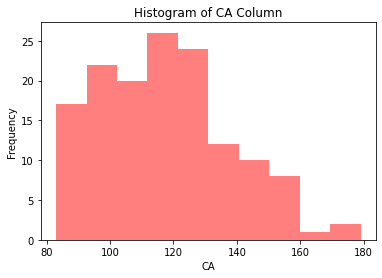

In [150]:
import matplotlib.pyplot as plt

plt.hist(dfg_4['CA'],  color='red', alpha=0.5)
plt.xlabel('CA')
plt.ylabel('Frequency')
plt.title('Histogram of CA Column')
plt.show()

In [151]:
dfg_4.to_csv('GOALKEEPERS.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   feature_idx    20 non-null     object
 1   cv_scores      20 non-null     object
 2   avg_score      20 non-null     object
 3   feature_names  20 non-null     object
 4   ci_bound       20 non-null     object
 5   std_dev        20 non-null     object
 6   std_err        20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB
